In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
test_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')
sample_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/sample.csv')

In [3]:
train_data.shape

(12379, 31)

In [4]:
train_data.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype='object')

In [5]:
train_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [6]:
for column in train_data.columns:
    if train_data[column].isna().sum() != 0:
        print(f'Column Name: {column}, NA values: {train_data[column].isna().sum()}')

Column Name: no_visited_Cold drinks, NA values: 198
Column Name: Restaur_spend_less_than20, NA values: 121
Column Name: no_visited_bars, NA values: 93
Column Name: car, NA values: 12268
Column Name: no_Take-aways, NA values: 144
Column Name: Restaur_spend_greater_than20, NA values: 160


In [7]:
org_cols = ['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted']

In [8]:
train_data = train_data[['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender','restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted']]

## dropped 'car' column becuase of large number of missing values

In [9]:
train_data.shape

(12379, 30)

In [10]:
def dicom(column):
    print('Column name = ', column)
    for value in list(train_data[column].unique()):
        yes = ((train_data[column]==value) & (train_data['Offer Accepted']=='Yes')).sum()
        no = ((train_data[column]==value) & (train_data['Offer Accepted']=='No')).sum()
        print(f'value ="{value}", yes = {round(yes*100/(yes+no),2)}%')
    y = round((train_data['Offer Accepted']=='Yes').sum()*100/((train_data['Offer Accepted']=='Yes').sum()+(train_data['Offer Accepted']=='No').sum()),2)
#     print(f'overall yes = {y}%')

In [11]:
for column in list(train_data.columns):
    dicom(column)
    print('\n**********************************\n')

Column name =  offer expiration
value ="2days", yes = 59.58%
value ="10hours", yes = 52.76%

**********************************

Column name =  income_range
value ="₹100000 or More", yes = 57.74%
value ="₹87500 - ₹99999", yes = 54.43%
value ="₹37500 - ₹49999", yes = 56.74%
value ="Less than ₹12500", yes = 57.91%
value ="₹50000 - ₹62499", yes = 57.7%
value ="₹12500 - ₹24999", yes = 57.2%
value ="₹75000 - ₹87499", yes = 51.45%
value ="₹25000 - ₹37499", yes = 57.31%
value ="₹62500 - ₹74999", yes = 53.2%

**********************************

Column name =  no_visited_Cold drinks
value ="4~8", yes = 59.91%
value ="less1", yes = 55.54%
value ="never", yes = 48.16%
value ="1~3", yes = 62.98%
value ="gt8", yes = 58.04%
value ="nan", yes = nan%

**********************************

Column name =  travelled_more_than_15mins_for_offer
value ="1", yes = 53.55%
value ="0", yes = 60.33%

**********************************

Column name =  Restaur_spend_less_than20
value ="less1", yes = 53.75%
value ="4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  



**********************************

Column name =  age
value ="36", yes = 54.57%
value ="50plus", yes = 52.68%
value ="26", yes = 58.4%
value ="46", yes = 55.59%
value ="21", yes = 59.92%
value ="below21", yes = 58.95%
value ="41", yes = 54.53%
value ="31", yes = 54.9%

**********************************

Column name =  Prefer western over chinese
value ="0", yes = 56.59%
value ="1", yes = 56.41%

**********************************

Column name =  travelled_more_than_25mins_for_offer
value ="0", yes = 58.0%
value ="1", yes = 45.4%

**********************************

Column name =  travelled_more_than_5mins_for_offer
value ="1", yes = 56.5%

**********************************

Column name =  no_visited_bars
value ="less1", yes = 56.14%
value ="never", yes = 53.61%
value ="1~3", yes = 60.25%
value ="nan", yes = nan%
value ="4~8", yes = 61.41%
value ="gt8", yes = 62.07%

**********************************

Column name =  gender
value ="Female", yes = 55.12%
value ="Male", yes = 57.94%



In [12]:
train_data.dropna(inplace=True)
print(train_data.shape, type(train_data))

#dropping rows having missing values

(11802, 30) <class 'pandas.core.frame.DataFrame'>


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
# x, y = train_data[['offer expiration', 'income_range', 'no_visited_Cold drinks',
#        'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
#        'Marital Status', 'restaurant type', 'age',
#        'Prefer western over chinese', 'travelled_more_than_25mins_for_offer','no_visited_bars', 'gender','restuarant_same_direction_house', 'Cooks regularly',
#        'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
#        'Job/Job Industry', 'restuarant_opposite_direction_house',
#        'has Children', 'visit restaurant with rating (avg)', 'temperature',
#        'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
#        'drop location', 'Prefer home food']], train_data['Offer Accepted']

In [15]:
x = train_data[['offer expiration',
                   'income_range', 
                   'no_visited_Cold drinks',
                   'travelled_more_than_15mins_for_offer',
                   'Restaur_spend_less_than20',
                   'Marital Status',
                   'restaurant type',
                   'age',
                   'Prefer western over chinese',
                   'travelled_more_than_25mins_for_offer',
                   'no_visited_bars',
                   'gender',
                   'restuarant_same_direction_house',
                    'Restaur_spend_greater_than20',
                   'Cooks regularly',
                   'Customer type',
                   'Qualification',
                   'is foodie',
                   'no_Take-aways',
                   'Job/Job Industry',
#                    'restuarant_opposite_direction_house',
                   'has Children', 'visit restaurant with rating (avg)',
                   'temperature',
                   'Travel Time',
                   'Climate',
                   'drop location',
                   'Prefer home food']]
# dropped columns ['travelled_more_than_5mins_for_offer','Restaur_spend_greater_than20', 'Offer Accepted']

y = train_data['Offer Accepted']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9441, 27)
(9441,)
(2361, 27)
(2361,)


In [18]:
x_train.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'no_visited_bars', 'gender', 'restuarant_same_direction_house',
       'Restaur_spend_greater_than20', 'Cooks regularly', 'Customer type',
       'Qualification', 'is foodie', 'no_Take-aways', 'Job/Job Industry',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Travel Time', 'Climate', 'drop location', 'Prefer home food'],
      dtype='object')

In [19]:
dropped_cols = [col for col in org_cols if col not in list(x_train.columns)]

In [20]:
dropped_cols

['travelled_more_than_5mins_for_offer',
 'car',
 'restuarant_opposite_direction_house',
 'Offer Accepted']

In [21]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train[0:5]

array([1, 0, 1, 1, 1])

In [22]:
onehot = ['Marital Status', 
          'restaurant type',
          'gender',
          'Customer type',
          'Job/Job Industry',
          'Climate',
          'drop location']

In [23]:
x['Qualification'].unique()

array(['Bachelors degree', 'Some college - no degree',
       'Graduate degree (Masters or Doctorate)', 'Associates degree',
       'High School Graduate', 'Some High School'], dtype=object)

In [24]:
orden_offer_expiration = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[['2days', '10hours']])
orden_income_range = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[['Less than ₹12500', '₹12500 - ₹24999', '₹25000 - ₹37499', '₹37500 - ₹49999', '₹50000 - ₹62499', '₹62500 - ₹74999', '₹75000 - ₹87499', '₹87500 - ₹99999', '₹100000 or More']])
orden_counts = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[['never','less1', '1~3', '4~8', 'gt8']])
orden_qual = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[['Some High School','High School Graduate','Some college - no degree', 'Associates degree', 'Bachelors degree','Graduate degree (Masters or Doctorate)']])
orden_age = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[[ 'below21','21', '26', '31','36', '41', '46','50plus']])

In [25]:
ct1 = ColumnTransformer([
    ('ord1', orden_offer_expiration, ['offer expiration']),
    ('ord2', orden_income_range, ['income_range']),
    ('ord3', orden_counts, ['no_visited_Cold drinks']),
    ('ord4', orden_counts, ['Restaur_spend_less_than20']),
    ('ord5', orden_counts, ['no_visited_bars']),
    ('ord6', orden_counts, ['no_Take-aways']),
    ('ord7', orden_counts, ['Restaur_spend_greater_than20']),
    ('ord8', orden_qual, ['Qualification']),
    ('ord9', orden_age, ['age']),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop="first"), onehot),
    ('stdsc1', StandardScaler(), ['temperature']),
    ('stdsc2', StandardScaler(), ['Travel Time']),
    ('stdsc3', StandardScaler(), ['visit restaurant with rating (avg)'])
],
remainder='passthrough')

In [26]:
x_train = ct1.fit_transform(x_train)

In [27]:
x_train.shape

(9441, 60)

In [28]:
x_test = ct1.transform(x_test)

In [29]:
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf2.fit(x_train, y_train)
y_pred_train, y_pred_test = clf2.predict(x_train), clf2.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7152446421350587
0.6948989412897016
0.6270522190445927
0.5972045743329097


In [30]:
params = {"max_depth":[2,3,4,5,6]}
gv = GridSearchCV(clf2, param_grid = params)
gv.fit(x_train, y_train)
y_pred_train, y_pred_test = gv.best_estimator_.predict(x_train), gv.best_estimator_.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(f'best params: {gv.best_params_}')

0.7185259296314824
0.6805831676607024
0.6424107615718674
0.5916984328674291
best params: {'max_depth': 6}


In [31]:
from sklearn.svm import SVC
clf3 = SVC(kernel='rbf')
clf3.fit(x_train, y_train)
y_pred_train, y_pred_test = clf3.predict(x_train), clf3.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7405309161540952
0.704361873990307
0.6604173286728101
0.6124523506988564


In [32]:
from xgboost import XGBClassifier, plot_importance
xgbc = XGBClassifier(booster= 'gbtree', eta= 0.25, gamma= 0.05, max_depth= 5)
xgbc.fit(x_train, y_train)
y_pred_train, y_pred_test = xgbc.predict(x_train), xgbc.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8455804046858361
0.6741180579811387
0.8156974896727042
0.6048284625158831


<Figure size 864x864 with 0 Axes>

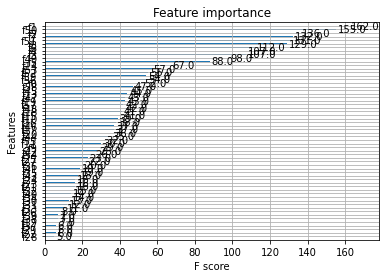

In [33]:
# check feature importance from excel labelled data
# try to combine labels
# hyperturning
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_importance(xgbc)
plt.show()

In [34]:
# params = {"max_depth":[2,3,4,5,6], 'loss':['log_loss', 'deviance', 'exponential'], 'learning_rate':[0.01,0.1,1], 'subsample':[0.4,0.5,0.7,0.8,0.9,1]}
# params = {"booster":["gbtree", "gblinear"], 'eta':[0.25,0.35,0.35], 'gamma':[0, 0.05, 0.10], 'max_depth':[5,6,7]}
# gv = GridSearchCV(xgbc, param_grid = params)
# gv.fit(x_train, y_train)
# y_pred_train, y_pred_test = gv.best_estimator_.predict(x_train), gv.best_estimator_.predict(x_test)
# print(f1_score(y_train, y_pred_train))
# print(f1_score(y_test, y_pred_test))
# print(accuracy_score(y_train, y_pred_train))
# print(accuracy_score(y_test, y_pred_test))

In [35]:
gv.best_params_

{'max_depth': 6}

In [36]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(x_train, y_train)
y_pred_train, y_pred_test = neigh.predict(x_train), neigh.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7245110691948774
0.6015810276679842
0.7060692723228471
0.5730622617534943


In [37]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.005)
clf.fit(x_train, y_train)
y_pred_train, y_pred_test = clf.predict(x_train), clf.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.857856220404649
0.6668965517241379
0.8251244571549624
0.590851334180432


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [38]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(max_depth=11)
clf4.fit(x_train, y_train)
y_pred_train, y_pred_test = clf4.predict(x_train), clf4.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8736456076012667
0.7181903864278981
0.8394237898527699
0.6200762388818297


In [39]:
from sklearn.ensemble import AdaBoostClassifier
clf4 = AdaBoostClassifier(n_estimators=40)
clf4.fit(x_train, y_train)
y_pred_train, y_pred_test = clf4.predict(x_train), clf4.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6982438365417089
0.6844775109908692
0.6214384069484165
0.6048284625158831


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(max_depth=3, subsample=0.7)
gbclf.fit(x_train, y_train)
y_pred_train, y_pred_test = gbclf.predict(x_train), gbclf.predict(x_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7395503746877602
0.7022340780260087
0.6686791653426544
0.6217704362558238


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.40      0.48      1027
           1       0.63      0.79      0.70      1334

    accuracy                           0.62      2361
   macro avg       0.61      0.60      0.59      2361
weighted avg       0.62      0.62      0.61      2361



In [42]:
# # params = {"max_depth":[2,3,4,5,6], 'loss':['log_loss', 'deviance', 'exponential'], 'learning_rate':[0.01,0.1,1], 'subsample':[0.4,0.5,0.7,0.8,0.9,1]}
# params = {"max_depth":[2,3,4,5,6], 'subsample':[0.5,0.5,0.7,0.8,0.9,1]}
# gv = GridSearchCV(gbclf, param_grid = params)
# gv.fit(x_train, y_train)
# y_pred_train, y_pred_test = gv.best_estimator_.predict(x_train), gv.best_estimator_.predict(x_test)
# print(f1_score(y_train, y_pred_train))
# print(f1_score(y_test, y_pred_test))
# print(accuracy_score(y_train, y_pred_train))
# print(accuracy_score(y_test, y_pred_test))

In [43]:
gv.best_params_

{'max_depth': 6}

In [44]:
#for comparision only

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, log_loss
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# classifiers = [
#     LogisticRegression(),
#     KNeighborsClassifier(10),
#     SVC(kernel="rbf", C=0.025, probability=True),
#     NuSVC(probability=True),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis()]

# # Logging for Visual Comparison
# log_cols=["Classifier", "Accuracy", "Log Loss"]
# log = pd.DataFrame(columns=log_cols)

# for clf in classifiers:
#     clf.fit(x_train, y_train)
#     name = clf.__class__.__name__
    
#     print("="*30)
#     print(name)
    
#     print('****Results****')
#     train_predictions = clf.predict(x_test)
#     acc = accuracy_score(y_test, train_predictions)
#     print("Accuracy: {:.4%}".format(acc))
    
#     train_predictions = clf.predict_proba(x_test)
#     ll = log_loss(y_test, train_predictions)
#     print("Log Loss: {}".format(ll))
    
#     log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
#     log = log.append(log_entry)
    
# print("="*30)

In [45]:
test_data = ct1.transform(test_data)

In [46]:
pred = xgbc.predict(test_data)
print("i ran")

i ran


In [47]:
pred = le.inverse_transform(pred)

In [48]:
train_data['Offer Accepted'].head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: Offer Accepted, dtype: object

In [49]:
le.inverse_transform(y_train)[:5]

array(['Yes', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [50]:
pred

array(['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [51]:
sub = pd.DataFrame(columns = sample_data.columns)

In [52]:
sub['id'] = [i for i in range(len(pred))]
sub['Offer Accepted']=pred

In [53]:
sub

,id,Offer Accepted
0,0,No
1,1,Yes
2,2,Yes
3,3,No
4,4,Yes
...,...,...
5300,5300,Yes
5301,5301,Yes
5302,5302,Yes
5303,5303,Yes


In [54]:
sub.to_csv('submission.csv', index=False)
print("i ran")

i ran
